## File name and a Preview

data-2.csv

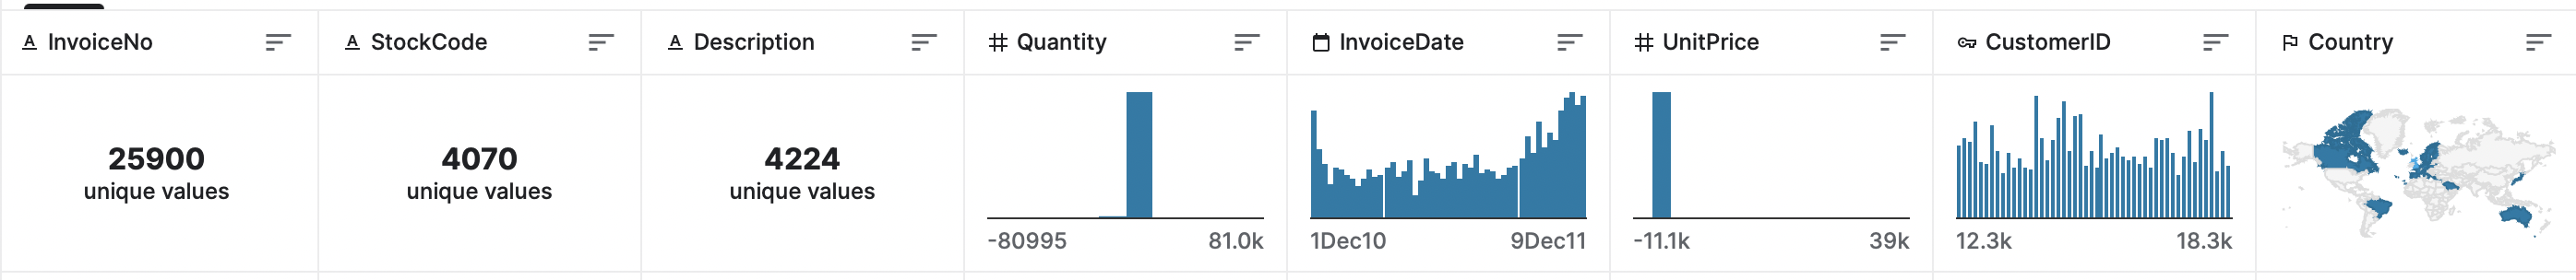

---
- it looks like log of sells by period (~1 year) and country
- very wide range of Quantity and UnitPrice, also the negative numbers there is looking curious

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud


In [91]:
# read the file, drop the duplicates

df = pd.read_csv('data-2.csv')
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [92]:
# parsing the datetimes

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [103]:
# making CustomerID integers

df['CustomerID'] = df['CustomerID'].astype(int)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [96]:
# find and fill NaNs

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [98]:
df['Description'].fillna('', inplace=True)
df['CustomerID'].fillna(0, inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [105]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,536641.00,536641.00,536641.00
mean,9.62,4.63,11435.90
std,219.13,97.23,6795.04
min,-80995.00,-11062.06,0.00
25%,1.00,1.25,0.00
50%,3.00,2.08,14336.00
75%,10.00,4.13,16241.00
max,80995.00,38970.00,18287.00


In [377]:
df.corr(numeric_only=True)

,Quantity,UnitPrice,CustomerID,Price,Invoice_month,Invoice_day,Invoice_time
Quantity,1.000000,-0.001241,0.018941,0.886712,-0.001028,-0.000809,-0.011273
UnitPrice,-0.001241,1.000000,-0.020666,-0.162043,-0.000438,-0.007281,0.001282
CustomerID,0.018941,-0.020666,1.000000,0.010553,0.029754,0.164099,-0.226696
Price,0.886712,-0.162043,0.010553,1.000000,0.000240,-0.002339,-0.009129
Invoice_month,-0.001028,-0.000438,0.029754,0.000240,1.000000,0.039819,0.025842
Invoice_day,-0.000809,-0.007281,0.164099,-0.002339,0.039819,1.000000,-0.033374
Invoice_time,-0.011273,0.001282,-0.226696,-0.009129,0.025842,-0.033374,1.000000


---
- observation of extreme bigs:

In [108]:
df[df['Quantity'].between(-2000, 2000) == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029,United Kingdom
50849,540564,22617,"mouldy, thrown away.",-2600,2011-01-10 10:36:00,0.00,0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
74614,542504,37413,,5568,2011-01-28 12:03:00,0.00,0,United Kingdom
74615,542505,79063D,,2560,2011-01-28 12:04:00,0.00,0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333,United Kingdom


- it seems problematic rows are already marked with UnitPrice=0 and CustomerID=0
---

In [110]:
df[df['UnitPrice'].between(-5000, 5000) == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,0,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,0,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,0,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,0,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,0,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,0,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,0,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,0,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,0,United Kingdom
96845,C544589,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:11:00,5258.77,0,United Kingdom


**OBSERVATIONS:**
- big quantities are okay, errors are already solved
- negative quantities are okay, it looks like returns
- big unit prices look like like aggregated (outsourced) sells
- negative unit prices look okay, they are debts
- repetitions like below look like cancelled and retried bank transactions (system tries to make a payment until succeed)

15016	C537630	AMAZONFEE	AMAZON FEE	-1	2010-12-07 15:04:00	13541.33	0	United Kingdom

15017	537632 	AMAZONFEE	AMAZON FEE	1	2010-12-07 15:08:00	13541.33	0	United Kingdom

16356	C537651	AMAZONFEE	AMAZON FEE	-1	2010-12-07 15:49:00	13541.33	0	United Kingdom

____________________
## QUANTITY
____________________

In [111]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


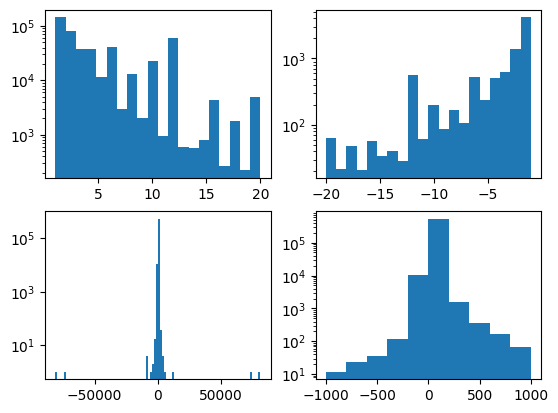

In [114]:
plt.subplot(221)
plt.hist(df[df['Quantity'].between(1, 20)]['Quantity'], bins=20, log=True)

plt.subplot(222)
plt.hist(df[df['Quantity'].between(-20, -1)]['Quantity'], bins=20, log=True)

plt.subplot(223)
plt.hist(df['Quantity'], bins=100, log=True)

plt.subplot(224)
plt.hist(df[df['Quantity'].between(-1000, 1000)]['Quantity'], bins=10, log=True)

plt.show()

---
### ABOUT QUANTITY:
- it's double exponential distribution, right and left from zero with the most repeated value 1
- **surprising thing: even numbers are much more frequent**

____________________
## UNIT PRICE
____________________

In [121]:
# list of zero unitprice descriptions

df[df['UnitPrice'] == 0]['Description'].value_counts()


                                    1454
check                                159
?                                     47
damages                               45
damaged                               43
                                    ... 
HEART GARLAND RUSTIC PADDED            1
CHICK GREY HOT WATER BOTTLE            1
mystery! Only ever imported 1800       1
POSSIBLE DAMAGES OR LOST?              1
lost                                   1
Name: Description, Length: 377, dtype: int64

In [13]:
negative unit prices

df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,2011-08-12
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,2011-08-12


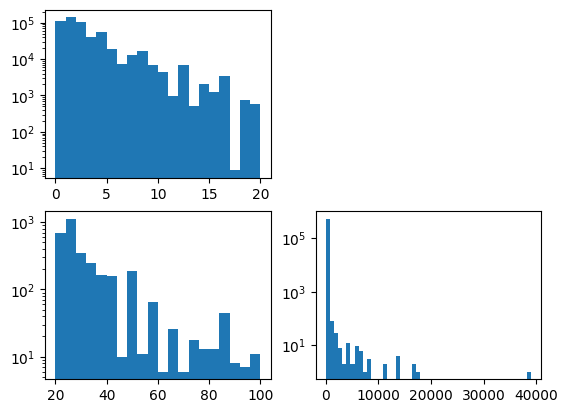

In [126]:
plt.subplot(221)
plt.hist(df[df['UnitPrice'].between(0, 20)]['UnitPrice'], bins=20, log=True)

# plt.subplot(222)
# plt.hist(df[df['UnitPrice'].between(-, 19)]['UnitPrice'], bins=100)

plt.subplot(223)
plt.hist(df[df['UnitPrice'].between(20, 100)]['UnitPrice'], bins=20, log=True)

plt.subplot(224)
plt.hist(df[df['UnitPrice'] > 0]['UnitPrice'], bins=50, log=True)

plt.show()

---
### ABOUT UNITPRICE:
- it's an exponential distribution, most of values are around 2-3
- I'm not sure negative two are errors, though I would change them to positive and quantity to negative if it's important

____________________
## Description
____________________

In [128]:
df[df['Description'].isna() == False]['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 535187, dtype: object

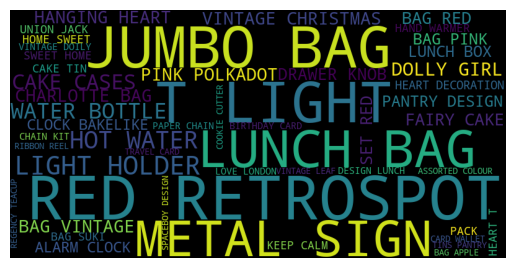

In [128]:
text = ' '.join(df['Description'].values)
cloud = wordcloud.WordCloud(max_words=50, height=400, width=800).generate(str(text))

plt.imshow(cloud)
plt.axis("off")
plt.show()

---
- the most frequent products are Bags, Boxes, Bottles, and some products for home
---

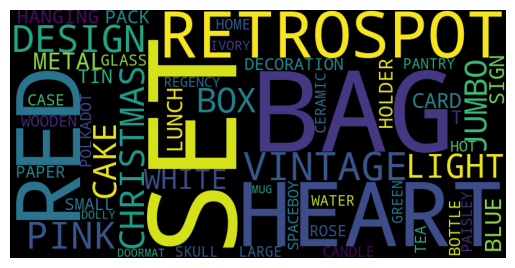

In [129]:
cloud = wordcloud.WordCloud(max_words=50, height=400, width=800, collocations=False).generate(str(text))

plt.imshow(cloud)
plt.axis("off")
plt.show()

In [130]:
# odds

cloud.words_

{'SET': 1.0,
 'BAG': 0.8236668149748936,
 'HEART': 0.6963706858196148,
 'RED': 0.6918419881777156,
 'RETROSPOT': 0.5537564355177016,
 'VINTAGE': 0.5317644441619526,
 'DESIGN': 0.48112248140850444,
 'PINK': 0.47700692811288375,
 'CHRISTMAS': 0.39531557871988815,
 'BOX': 0.3849710798957605,
 'LIGHT': 0.3702091145998856,
 'CAKE': 0.3618508866713278,
 'JUMBO': 0.3335028284497553,
 'WHITE': 0.3332803661094515,
 'METAL': 0.33324858577512234,
 'BLUE': 0.31645267908218394,
 'LUNCH': 0.2906629377741054,
 'CARD': 0.27467742960655944,
 'SIGN': 0.2720237716900782,
 'HANGING': 0.2676221953854955,
 'T': 0.2659696180003814,
 'HOLDER': 0.260439839827115,
 'TIN': 0.25808809508676034,
 'PACK': 0.24742579291934153,
 'DECORATION': 0.22969236636369414,
 'PAPER': 0.2284052628233649,
 'SMALL': 0.22532257039344053,
 'WOODEN': 0.20008898493612154,
 'POLKADOT': 0.19931036674505817,
 'GLASS': 0.19870654039280494,
 'TEA': 0.19571918896586793,
 'BOTTLE': 0.19257293586728533,
 'CASE': 0.19018941079260154,
 'ROSE': 

---
- The most frequent are Heart, red, pink, vintage, retrospot, christmas. Sets and bags. Feel the vibe?
---

____________________
## COUNTRY
____________________

In [175]:
df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Most of sells are in United Kingdom. Others to the closest big countries

____________________
## NEW VARIABLE 'PRICE':
____________________

In [131]:
df['Price'] = df['Quantity'] * df['UnitPrice']

<Axes: ylabel='Frequency'>

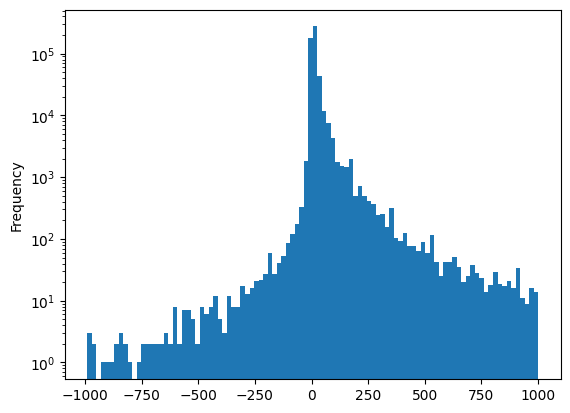

In [137]:
df[df['Price'].between(-1000, 1000)]['Price'].plot.hist(bins=100, log=True)

---
- Distribution became even more exponential
---

_____
### BY COUNTRY
_____

In [139]:
sums = df.groupby(by='Country')['Price'].sum()
sums.sort_values(ascending=False)

Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

<Axes: xlabel='Country'>

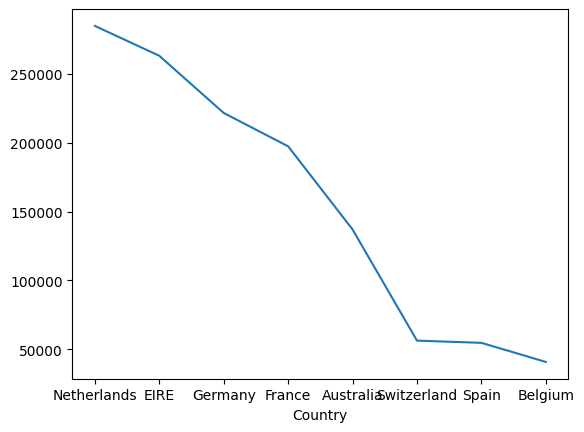

In [140]:
sums.sort_values(ascending=False)[1:9].plot()

___
BY DATE
___

In [141]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Invoice_date'] = df['InvoiceDate'].dt.date
sums = df.groupby(by='Invoice_date')['Price'].sum()
sums


Invoice_date
2010-12-01    58451.56
2010-12-02    46088.32
2010-12-03    45575.38
2010-12-05    30973.63
2010-12-06    53653.87
                ...   
2011-12-05    57630.20
2011-12-06    54109.39
2011-12-07    74952.61
2011-12-08    81294.33
2011-12-09    32111.91
Name: Price, Length: 305, dtype: float64

<Axes: xlabel='Invoice_date'>

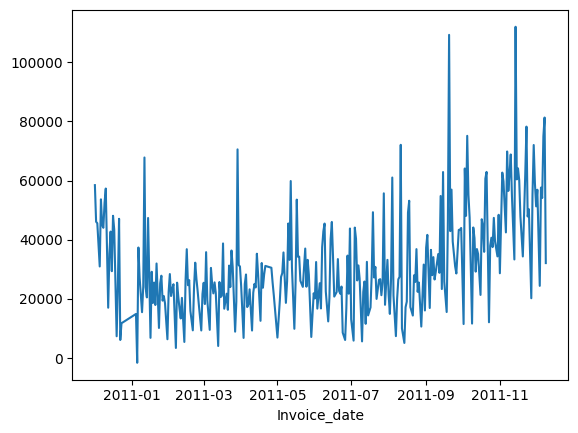

In [143]:
sums.plot()

<Axes: xlabel='Invoice_month'>

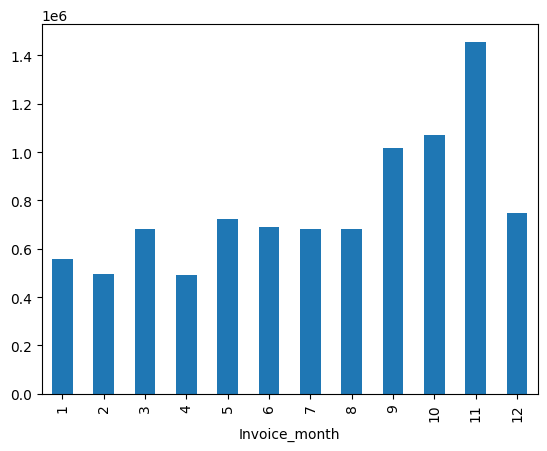

In [153]:
# price sum by month

df['Invoice_month'] = df['InvoiceDate'].dt.month
sums = df[df['InvoiceDate'] < '2011-12-01'].groupby(by='Invoice_month')['Price'].sum()
sums.plot.bar()

<Axes: xlabel='Invoice_day'>

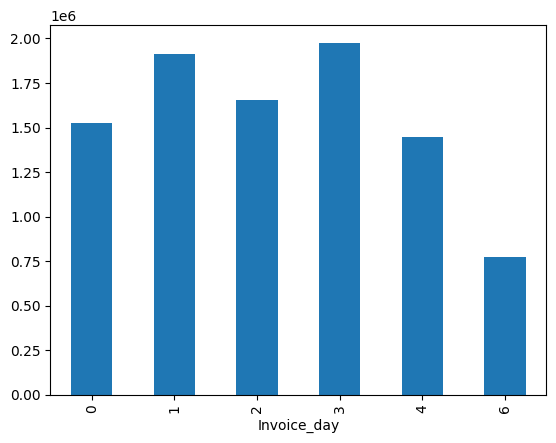

In [156]:
# price sum by day of the week

df['Invoice_day'] = df['InvoiceDate'].dt.dayofweek
sums = df[df['InvoiceDate'] < '2011-12-01'].groupby(by='Invoice_day')['Price'].sum()
sums.plot.bar()

<Axes: xlabel='Invoice_time'>

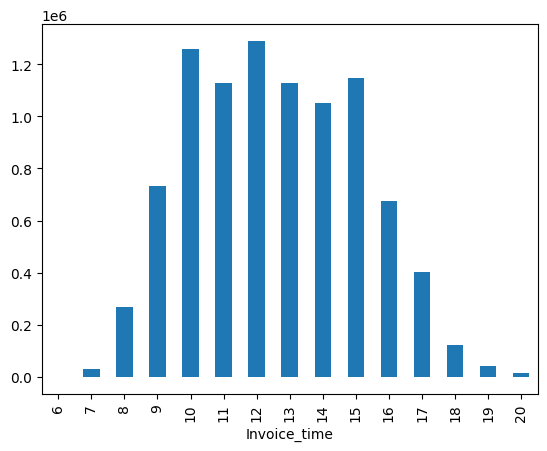

In [158]:
# price sum by hours

df['Invoice_time'] = df['InvoiceDate'].dt.hour
sums = df[df['InvoiceDate'] < '2011-12-01'].groupby(by='Invoice_time')['Price'].sum()
sums.plot.bar()

In [214]:
print(df[df['InvoiceDate'].between('2010-10-01', '2010-12-09')]['Price'].sum().round(), 'by 1-9 DEC, 2010')
print(df[df['InvoiceDate'].between('2011-10-01', '2011-12-09')]['Price'].sum().round(), 'by 1-9 DEC, 2011')

323773.0 by 1-9 DEC, 2010
2926103.0 by 1-9 DEC, 2011


___
BEST and WORST SELLING PRODUCTS at all time
___

In [159]:
sums = df.groupby(by='Description')['Price'].sum()
sums.sort_values(ascending=False).head(10)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: Price, dtype: float64

In [162]:
sums = df.groupby(by='Description')['Price'].sum()
sums.sort_values(ascending=True).head(10)

Description
AMAZON FEE                       -221520.500
Manual                            -69031.640
Adjust bad debt                   -11062.060
CRUK Commission                    -7933.430
Bank Charges                       -7175.639
Discount                           -5696.220
SAMPLES                            -3039.650
WHITE CHERRY LIGHTS                  -54.000
CREAM SWEETHEART MAGAZINE RACK       -46.850
WOODEN BOX ADVENT CALENDAR           -45.700
Name: Price, dtype: float64

- Oh, wow! fees, debts and the most returned products
- Let's see others

In [164]:
# worst selling products with price > 0

sums = df[df['Price'] > 0].groupby(by='Description')['Price'].sum()
sums.sort_values(ascending=True).head(10)

Description
PADS TO MATCH ALL CUSHIONS             0.003
HEN HOUSE W CHICK IN NEST              0.420
SET 12 COLOURING PENCILS DOILEY        0.650
VINTAGE BLUE TINSEL REEL               0.840
PINK CRYSTAL GUITAR PHONE CHARM        0.850
CAT WITH SUNGLASSES BLANK CARD         0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
FUNKY MONKEY MUG                       1.250
WIRE FLOWER T-LIGHT HOLDER             1.250
Name: Price, dtype: float64

___
BEST CUSTOMERS
___

In [165]:
# best customers

sums = df.groupby(by='CustomerID')['Price'].sum()
sums.sort_values()[::-1].head(10)

CustomerID
0        1447487.53
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
Name: Price, dtype: float64

In [166]:
# the customers which returned more

sums.sort_values().head(10)

CustomerID
17448   -4287.63
15369   -1592.49
14213   -1192.20
17603   -1165.30
12503   -1126.00
15823    -840.76
13154    -611.86
15802    -451.42
16252    -295.09
12666    -227.44
Name: Price, dtype: float64

In [167]:
# worst customers

sums = df[df['Price'] > 0].groupby(by='CustomerID')['Price'].sum()
sums.sort_values().head(10)

CustomerID
16738     3.75
14792     6.20
16454     6.90
17956    12.75
16878    13.30
15823    15.00
17763    15.00
13307    15.00
16093    17.00
16953    20.80
Name: Price, dtype: float64

---
# SUMMARY OF THE OBSERVATION
- The firm was selling some package and home decoration stuff in UK. Less to the other countries, mostly nearby.
- Sells got better in autumn, especially in november (strange not in december, maybe Europeans prepare to Christmas one month before)
- sells in Sunday are also surprising. Maybe the time difference with Americas. Need to be proven.
- 
- Every distribution is exponential. No one is normal. In this case any mean comparisons could be useless
- Only thing I could think about is to compare price sums by countries and dates
---

In [209]:
countries_ls = list(df.groupby(by='Country')['Price'].sum().sort_values()[::-1].to_dict().keys())
print(countries_ls)

['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden', 'Japan', 'Norway', 'Portugal', 'Finland', 'Channel Islands', 'Denmark', 'Italy', 'Cyprus', 'Austria', 'Hong Kong', 'Singapore', 'Israel', 'Poland', 'Unspecified', 'Greece', 'Iceland', 'Canada', 'Malta', 'United Arab Emirates', 'USA', 'Lebanon', 'Lithuania', 'European Community', 'Brazil', 'RSA', 'Czech Republic', 'Bahrain', 'Saudi Arabia']


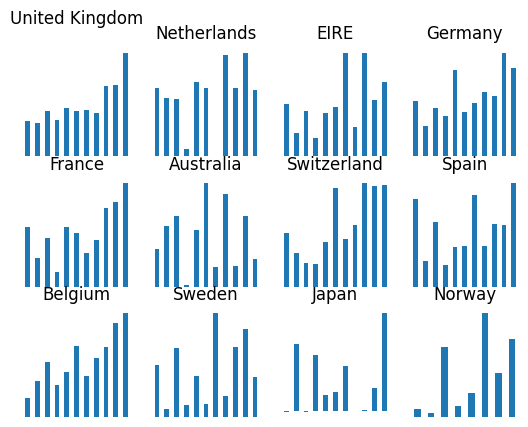

In [265]:
# price sum by month (from Jan to Nov included)

for i in range(0, 12):
    ax = plt.subplot(3,4,i+1)
    ax.set_title(countries_ls[i])
    ax.set_axis_off()
    sums = df[(df['InvoiceDate'].between('2011-01-01','2011-12-01')) & (df['Country'] == countries_ls[i])].groupby(by='Invoice_month')['Price'].sum()
    sums.plot.bar()
plt.show()

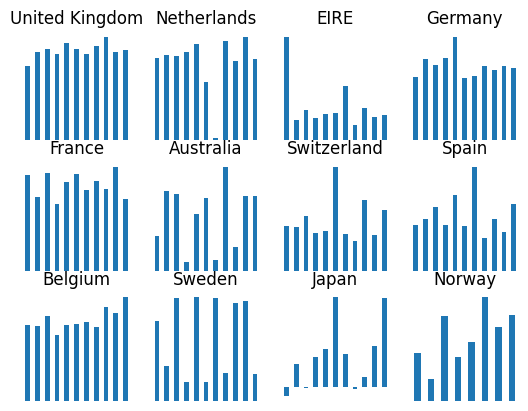

In [328]:
# price mean by month (from Jan to Nov included)

for i in range(0, 12):
    ax = plt.subplot(3,4,i+1)
    ax.set_title(countries_ls[i])
    ax.set_axis_off()
    sums = df[(df['InvoiceDate'].between('2011-01-01','2011-12-01')) & (df['Country'] == countries_ls[i])].groupby(by='Invoice_month')['Price'].mean()
    sums.plot.bar()
plt.show()

In [268]:
df['Price'].describe()

count    536641.000000
mean         18.123861
std         380.656263
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: Price, dtype: float64

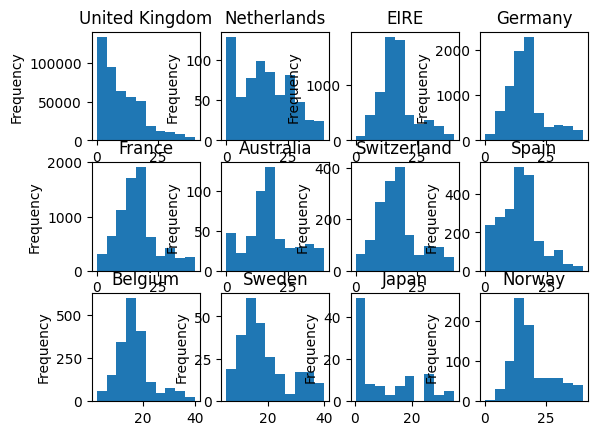

In [272]:
# most frequent price by country

for i in range(0, 12):
    ax = plt.subplot(3,4,i+1)
    ax.set_title(countries_ls[i])
#     ax.set_axis_off()
    price_bc = df[(df['Price'].between(0, 40)) & (df['Country'] == countries_ls[i])]['Price']
    price_bc.plot.hist(bins=10, log=False)
plt.show()

---
# SAVE
---

In [273]:
# !! Saving to pickle file to maybe return

df.to_pickle('data-2.pkl')

---
---

Text(0.5, 1.0, 'MEDIAN')

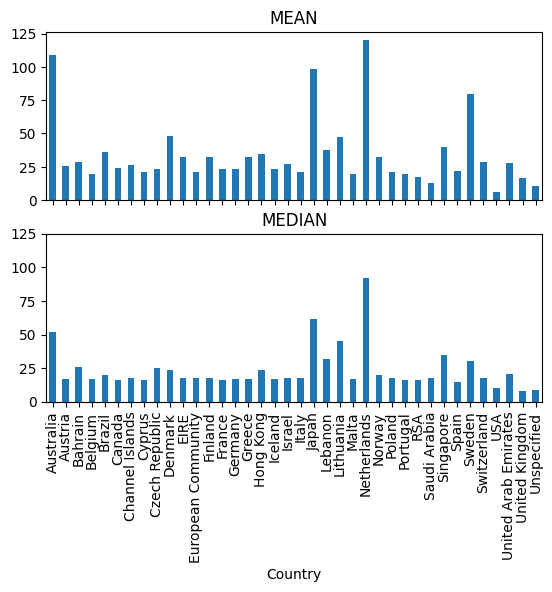

In [310]:
ax = plt.subplot(211)
df.groupby(by='Country')['Price'].mean().plot.bar()
ax.set_title('MEAN')
ax.set_xticklabels([])
ax.set_xlabel('')

ax = plt.subplot(212)
df.groupby(by='Country')['Price'].quantile(0.5).plot.bar()
ax.set_ybound(0, 125)
ax.set_title('MEDIAN')

---
- more mean is more than median - more big purchases it has
---

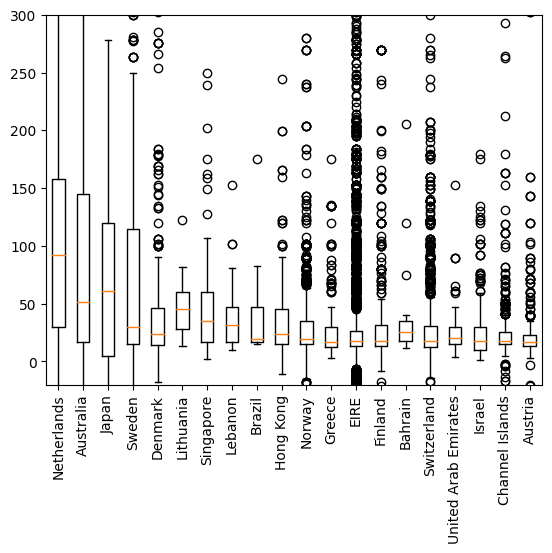

In [327]:
# sorted by MEAN first 20 boxplots

fig, ax = plt.subplots()
countries_ls_mean = list(df.groupby(by='Country')['Price'].mean().sort_values()[::-1].to_dict().keys())
box_list = [df[df['Country'] == i]['Price'] for i in countries_ls_mean]

ax.boxplot(box_list[:20])
ax.set_xticklabels(countries_ls_mean[:20], rotation=90)
ax.set_ybound(-20, 300)

plt.show()

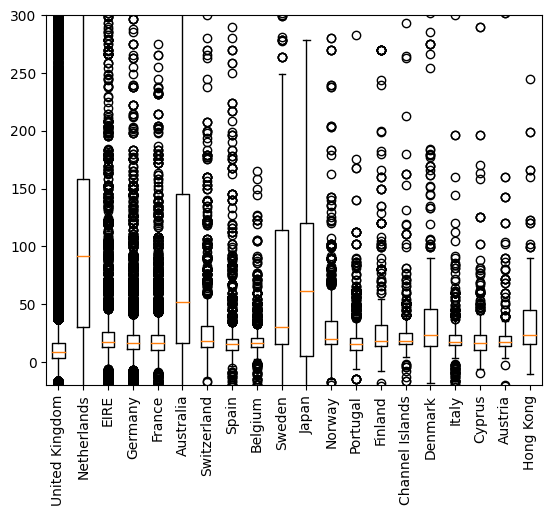

In [364]:
# sorted by SUM first 20 boxplots

fig, ax = plt.subplots()
countries_ls_mean = list(df.groupby(by='Country')['Price'].sum().sort_values()[::-1].to_dict().keys())
box_list = [df[df['Country'] == i]['Price'] for i in countries_ls_mean]

ax.boxplot(box_list[:20])
ax.set_xticklabels(countries_ls_mean[:20], rotation=90)
ax.set_ybound(-20, 300)

plt.show()

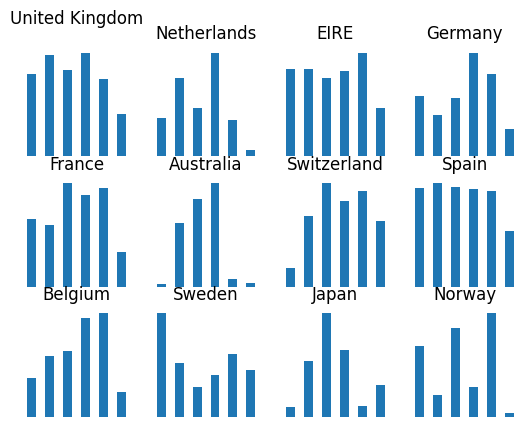

In [369]:
# top selling, total price by weekday

for i in range(0, 12):
    ax = plt.subplot(3,4,i+1)
    ax.set_title(countries_ls[i])
    ax.set_axis_off()
    sums = df[df['Country'] == countries_ls[i]].groupby(by='Invoice_day')['Price'].sum()
    sums.plot.bar()
plt.show()

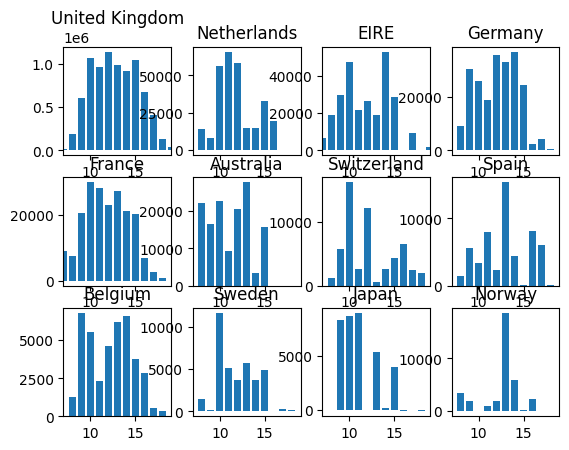

In [375]:
# top selling, total price sums by hour from 7 to 19

for i in range(0, 12):
    ax = plt.subplot(3,4,i+1)
    ax.set_title(countries_ls[i])
#     ax.set_axis_off()
    sums = df[df['Country'] == countries_ls[i]].groupby(by='Invoice_time')['Price'].sum()
#     sums.plot.bar()
    ax.bar(sums.to_dict().keys(), sums.to_list())
    ax.set_xbound(7,19)
plt.show()

## RETURNS

<Axes: xlabel='Country'>

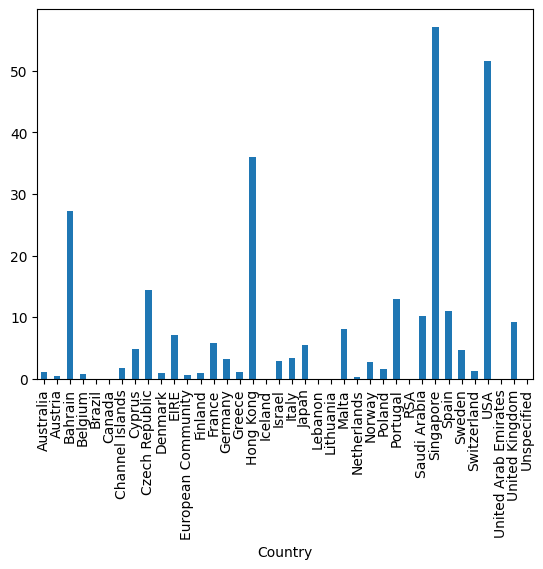

In [391]:
# Ratio between negative and positive sums by countries (most likely return / sell) in percent

sums = -100 * df[df['Price'] < 0].groupby(by='Country')['Price'].sum() / df[df['Price'] > 0].groupby(by='Country')['Price'].sum()
sums.plot.bar()

**Possible explanations**

1. It could be not returns but transaction cancellations. For example, if we try to buy something cost £10 with only one cancelled transaction:

- £10 attempt (failed)
- £ -10 return
- £10 attempt (succeed)

Then percentage following the formula above would be -1 * 100 * -10 / 20 = 50 (%)

2. Higher bars are countries with low turnover, so a couple big returns could be very significant in this case